In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv('medical_data.csv')

In [3]:
data.head()

,Symptom1,Symptom2,Symptom3,Symptom4,Symptom5,Symptom6,Symptom7,Symptom8,Symptom9,Symptom10,...,Symptom44,Symptom45,Symptom46,Symptom47,Symptom48,Symptom49,Symptom50,Symptom51,Symptom52,Disease
0,lumps,bad breath,listlessness,lethergy,weight loss,diarrhea,vomitting,none,none,none,...,none,none,none,none,none,none,none,none,none,Squamous cell carcinoma
1,none,bad breath,listlessness,lethergy,weight loss,diarrhea,vomitting,none,none,none,...,none,none,none,none,none,none,none,none,none,Squamous cell carcinoma
2,lumps,none,listlessness,lethergy,weight loss,diarrhea,vomitting,none,none,none,...,none,none,none,none,none,none,none,none,none,Squamous cell carcinoma
3,lumps,bad breath,none,lethergy,weight loss,diarrhea,vomitting,none,none,none,...,none,none,none,none,none,none,none,none,none,Squamous cell carcinoma
4,lumps,bad breath,listlessness,none,weight loss,diarrhea,vomitting,none,none,none,...,none,none,none,none,none,none,none,none,none,Squamous cell carcinoma


In [4]:
# Preprocess the dataset

In [5]:
symptom_features = list(set(data[['Symptom1', 'Symptom2', 'Symptom3', 'Symptom4', 'Symptom5', 'Symptom6', 'Symptom7', 'Symptom8', 'Symptom9', 'Symptom10', 'Symptom11', 'Symptom12', 'Symptom13', 'Symptom14', 'Symptom15', 'Symptom16', 'Symptom17', 'Symptom18', 'Symptom19', 'Symptom20', 'Symptom21', 'Symptom22', 'Symptom23', 'Symptom24', 'Symptom25', 'Symptom26', 'Symptom27', 'Symptom28', 'Symptom29', 'Symptom30', 'Symptom31', 'Symptom32', 'Symptom33', 'Symptom34', 'Symptom35', 'Symptom36', 'Symptom37', 'Symptom38', 'Symptom39', 'Symptom40', 'Symptom41', 'Symptom42', 'Symptom43', 'Symptom44', 'Symptom45', 'Symptom46', 'Symptom47', 'Symptom48', 'Symptom49', 'Symptom50', 'Symptom51', 'Symptom52']].values.ravel()))

In [6]:
data[['Symptom1', 'Symptom2', 'Symptom3', 'Symptom4', 'Symptom5', 'Symptom6', 'Symptom7', 'Symptom8', 'Symptom9', 'Symptom10', 'Symptom11', 'Symptom12', 'Symptom13', 'Symptom14', 'Symptom15', 'Symptom16', 'Symptom17', 'Symptom18', 'Symptom19', 'Symptom20', 'Symptom21', 'Symptom22', 'Symptom23', 'Symptom24', 'Symptom25', 'Symptom26', 'Symptom27', 'Symptom28', 'Symptom29', 'Symptom30', 'Symptom31', 'Symptom32', 'Symptom33', 'Symptom34', 'Symptom35', 'Symptom36', 'Symptom37', 'Symptom38', 'Symptom39', 'Symptom40', 'Symptom41', 'Symptom42', 'Symptom43', 'Symptom44', 'Symptom45', 'Symptom46', 'Symptom47', 'Symptom48', 'Symptom49', 'Symptom50', 'Symptom51', 'Symptom52']] = data[['Symptom1', 'Symptom2', 'Symptom3', 'Symptom4', 'Symptom5', 'Symptom6', 'Symptom7', 'Symptom8', 'Symptom9', 'Symptom10', 'Symptom11', 'Symptom12', 'Symptom13', 'Symptom14', 'Symptom15', 'Symptom16', 'Symptom17', 'Symptom18', 'Symptom19', 'Symptom20', 'Symptom21', 'Symptom22', 'Symptom23', 'Symptom24', 'Symptom25', 'Symptom26', 'Symptom27', 'Symptom28', 'Symptom29', 'Symptom30', 'Symptom31', 'Symptom32', 'Symptom33', 'Symptom34', 'Symptom35', 'Symptom36', 'Symptom37', 'Symptom38', 'Symptom39', 'Symptom40', 'Symptom41', 'Symptom42', 'Symptom43', 'Symptom44', 'Symptom45', 'Symptom46', 'Symptom47', 'Symptom48', 'Symptom49', 'Symptom50', 'Symptom51', 'Symptom52']].apply(lambda x: x.str.split(','))

In [7]:
data[['Symptom1', 'Symptom2', 'Symptom3', 'Symptom4', 'Symptom5', 'Symptom6', 'Symptom7', 'Symptom8', 'Symptom9', 'Symptom10', 'Symptom11', 'Symptom12', 'Symptom13', 'Symptom14', 'Symptom15', 'Symptom16', 'Symptom17', 'Symptom18', 'Symptom19', 'Symptom20', 'Symptom21', 'Symptom22', 'Symptom23', 'Symptom24', 'Symptom25', 'Symptom26', 'Symptom27', 'Symptom28', 'Symptom29', 'Symptom30', 'Symptom31', 'Symptom32', 'Symptom33', 'Symptom34', 'Symptom35', 'Symptom36', 'Symptom37', 'Symptom38', 'Symptom39', 'Symptom40', 'Symptom41', 'Symptom42', 'Symptom43', 'Symptom44', 'Symptom45', 'Symptom46', 'Symptom47', 'Symptom48', 'Symptom49', 'Symptom50', 'Symptom51', 'Symptom52']] = data[['Symptom1', 'Symptom2', 'Symptom3', 'Symptom4', 'Symptom5', 'Symptom6', 'Symptom7', 'Symptom8', 'Symptom9', 'Symptom10', 'Symptom11', 'Symptom12', 'Symptom13', 'Symptom14', 'Symptom15', 'Symptom16', 'Symptom17', 'Symptom18', 'Symptom19', 'Symptom20', 'Symptom21', 'Symptom22', 'Symptom23', 'Symptom24', 'Symptom25', 'Symptom26', 'Symptom27', 'Symptom28', 'Symptom29', 'Symptom30', 'Symptom31', 'Symptom32', 'Symptom33', 'Symptom34', 'Symptom35', 'Symptom36', 'Symptom37', 'Symptom38', 'Symptom39', 'Symptom40', 'Symptom41', 'Symptom42', 'Symptom43', 'Symptom44', 'Symptom45', 'Symptom46', 'Symptom47', 'Symptom48', 'Symptom49', 'Symptom50', 'Symptom51', 'Symptom52']].apply(lambda x: [item for sublist in x for item in sublist])

In [8]:
symptoms = data[['Symptom1', 'Symptom2', 'Symptom3', 'Symptom4', 'Symptom5', 'Symptom6', 'Symptom7', 'Symptom8', 'Symptom9', 'Symptom10', 'Symptom11', 'Symptom12', 'Symptom13', 'Symptom14', 'Symptom15', 'Symptom16', 'Symptom17', 'Symptom18', 'Symptom19', 'Symptom20', 'Symptom21', 'Symptom22', 'Symptom23', 'Symptom24', 'Symptom25', 'Symptom26', 'Symptom27', 'Symptom28', 'Symptom29', 'Symptom30', 'Symptom31', 'Symptom32', 'Symptom33', 'Symptom34', 'Symptom35', 'Symptom36', 'Symptom37', 'Symptom38', 'Symptom39', 'Symptom40', 'Symptom41', 'Symptom42', 'Symptom43', 'Symptom44', 'Symptom45', 'Symptom46', 'Symptom47', 'Symptom48', 'Symptom49', 'Symptom50', 'Symptom51', 'Symptom52']].values.tolist()

In [9]:
# Initialize a MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer(classes=symptom_features)
mlb.fit(symptoms)
symptoms_encoded = mlb.transform(symptoms)

In [10]:
# One-hot encoded symptoms
X = pd.DataFrame(symptoms_encoded, columns=mlb.classes_)
y = data['Disease']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create a decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
# Predict the labels for the test set
y_pred = classifier.predict(X_test)

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.17%


In [15]:
from sklearn.metrics import classification_report

In [16]:
# Print a classification report for more detailed evaluation
classification_report_str = classification_report(y_test, y_pred)
print(classification_report_str)

                               precision    recall  f1-score   support

                     Diabetes       0.50      1.00      0.67         1
Feline Immunodeficiency Virus       1.00      1.00      1.00         1
        Feline Leukemia Virus       1.00      1.00      1.00         2
                   Gingivitis       1.00      1.00      1.00         3
                    Heartworm       1.00      1.00      1.00         2
              Hyperthyroidism       0.00      0.00      0.00         1
                Lymphosarcoma       1.00      0.50      0.67         2
                 Pancreatitis       0.50      0.50      0.50         2
                Periodontitis       1.00      0.67      0.80         3
                       Rabies       0.00      0.00      0.00         1
                     Ringworm       1.00      1.00      1.00         1
      Squamous cell carcinoma       1.00      1.00      1.00         2
             Tooth Resorption       0.00      0.00      0.00         0
 Uppe

C:\Users\Nilki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nilki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nilki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nilki\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [17]:
#Out of 24 tests about 5 failed

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

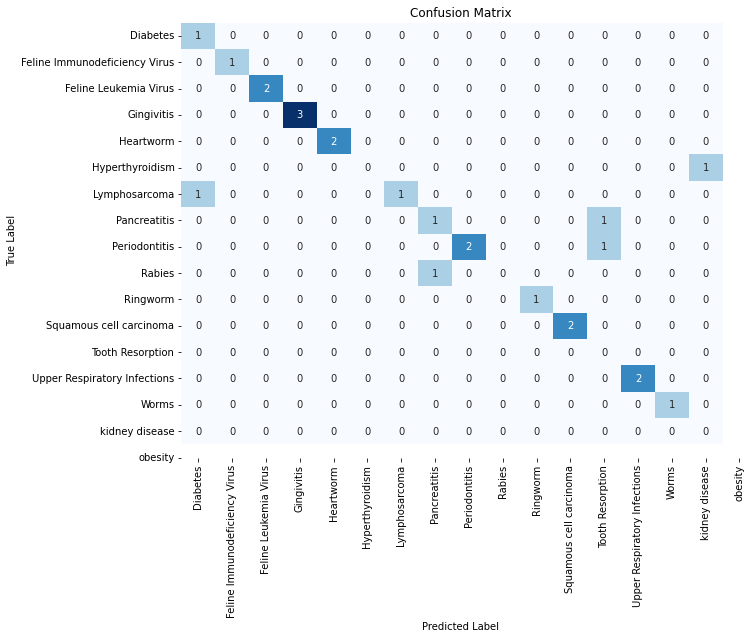

In [20]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
import numpy as np

In [26]:
# Get unique classes from y_test and y_pred
classes = sorted(np.unique(np.concatenate((y_test, y_pred))))

In [27]:
# Convert confusion matrix array to DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)

In [28]:
# Display the confusion matrix as a table
print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
                               Diabetes  Feline Immunodeficiency Virus  \
Diabetes                              1                              0   
Feline Immunodeficiency Virus         0                              1   
Feline Leukemia Virus                 0                              0   
Gingivitis                            0                              0   
Heartworm                             0                              0   
Hyperthyroidism                       0                              0   
Lymphosarcoma                         1                              0   
Pancreatitis                          0                              0   
Periodontitis                         0                              0   
Rabies                                0                              0   
Ringworm                              0                              0   
Squamous cell carcinoma               0                              0   
Tooth Resorption    